In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import argparse
import math

In [2]:
def convolution(image, kernel, average=False):
    # Check for colour image
    if len(image.shape) == 3:
        print("Found 3 Channels : {}".format(image.shape))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to Gray Channel. Size : {}".format(image.shape))
    # Else Grayscale image is found
    else:
        print("Image Shape : {}".format(image.shape))
 
    print("Kernel Shape : {}".format(kernel.shape))
 
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape
 
    # Set size of new image to the size of the original image
    output = np.zeros(image.shape)
 
    # Set the dimensions of the image padding
    pad_height = int((kernel_row - 1) / 2)
    pad_width = int((kernel_col - 1) / 2)
 
    # Generate the zeros for the padding
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
 
    # Fill up the empty padded image with the corresponding pixel values
    # of the original image
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
 
    # Convolution
    # From Lab2:
    #1. Get the product of the values of the corresponding pixels in both the kernel and the patch of the padded image 
    #2. Sum up all the products to get the output for this specific pixel.
    for row in range(image_row): # Top -> Bottom
        for col in range(image_col): # Left -> Right
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]
 
    print("Output Image size : {}".format(output.shape))
 
    # Return new image
    return output

In [9]:
# Standard Gaussian function
def gaussian_function(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)
 

# Generates a normalised Gaussian kernel with given size and sigma (std. dev.)
def gaussian_kernel(size, sigma=1):
    # Create a 1D kernel
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    
    # Run kernel through the Gaussian function
    for i in range(size):
        kernel_1D[i] = gaussian_function(kernel_1D[i], 0, sigma)
        
    # Considering a 2D Kernel is just the product of two 1D Kernels,
    # we can simply calculate it:
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    # Normalise the kernel (values add up to 1)
    kernel_2D *= 1.0 / kernel_2D.max()
 
    return kernel_2D
 
# Applies the convolution using a Gaussian Mask to form the final filter
def gaussian_blur(image, kernel_size, sigma):
    kernel = gaussian_kernel(kernel_size, sigma)
    return convolution(image, kernel, average=True)

Found 3 Channels : (338, 450, 3)
Converted to Gray Channel. Size : (338, 450)
Kernel Shape : (15, 15)
Output Image size : (338, 450)


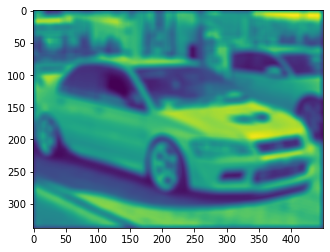

In [12]:
# Read image
img = cv2.imread('evo-vii.jpg')

# Examples of differences between kernel size (See Below)
# Apply a gaussian blur with kernel size 15 and standard deviation 5
img_blur = gaussian_blur(img, 15, 5)

plt.imshow(img_blur)
plt.show()

Found 3 Channels : (338, 450, 3)
Converted to Gray Channel. Size : (338, 450)
Kernel Shape : (5, 5)
Output Image size : (338, 450)


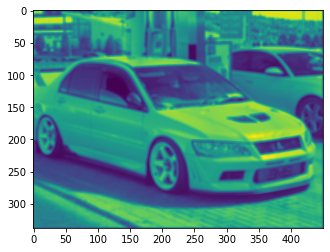

In [14]:
img_blur = gaussian_blur(img, 5, 5)

plt.imshow(img_blur)
plt.show()

Found 3 Channels : (338, 450, 3)
Converted to Gray Channel. Size : (338, 450)
Kernel Shape : (1, 1)
Output Image size : (338, 450)


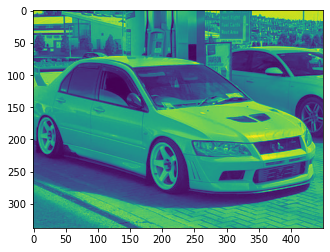

In [15]:
img_blur = gaussian_blur(img, 1, 5)

plt.imshow(img_blur)
plt.show()

Found 3 Channels : (338, 450, 3)
Converted to Gray Channel. Size : (338, 450)
Kernel Shape : (5, 5)
Output Image size : (338, 450)


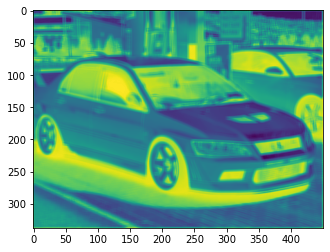

In [8]:
# Difference Of Gaussian Mask (DoG)
# Used later in SIFT methods.

# Sample 2 kernels
# Gaussian Kernel with a standard deviation of 3
gk3 = gaussian_kernel(5,3)
# -||- of 6
gk6 = gaussian_kernel(5,6)

# DoG is given simply by subtracting one Gaussian from another
dog_mask = gk3 - gk6

# Apply the convolution of the DoG mask
dog_img = convolution(img, dog_mask, average=False)

# Display image
plt.imshow(dog_img)
plt.show()